In [5]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import pandas as pd

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = pd.read_csv('nursery.csv')

cpx = data.drop(columns =["Class"], axis = 1)
enc_data = pd.DataFrame()
enc_data['parents']=le.fit_transform(cpx['parents'])
enc_data['has_nurs']=le.fit_transform(cpx['has_nurs'])
enc_data['form']=le.fit_transform(cpx['form'])
enc_data['children']=le.fit_transform(cpx['children'])
enc_data['housing']=le.fit_transform(cpx['housing'])
enc_data['finance']=le.fit_transform(cpx['finance'])
enc_data['social']=le.fit_transform(cpx['social'])
enc_data['health']=le.fit_transform(cpx['health'])
# dum_x = pd.get_dummies(cpx)

In [19]:
enc_data

,parents,has_nurs,form,children,housing,finance,social,health
0,2,3,0,0,0,0,0,2
1,2,3,0,0,0,0,0,1
2,2,3,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2
4,2,3,0,0,0,0,2,1
5,2,3,0,0,0,0,2,0
6,2,3,0,0,0,0,1,2
7,2,3,0,0,0,0,1,1
8,2,3,0,0,0,0,1,0
9,2,3,0,0,0,1,0,2


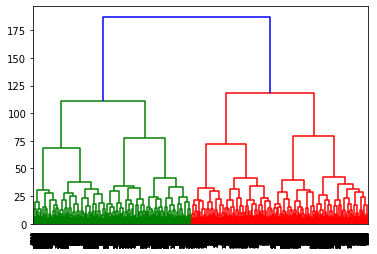

In [20]:
dendrogram = sch.dendrogram(sch.linkage(enc_data, method='ward'))

In [23]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
clust = hc.fit_predict(enc_data)

In [24]:
clust

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [25]:
data['Cluster'] = clust

In [26]:
data

,parents,has_nurs,form,children,housing,finance,social,health,Class,Cluster
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,0
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,0
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom,0
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority,0
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority,0
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom,0
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom,0


1556